In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

import warnings
warnings.filterwarnings('ignore')

from tqdm import tqdm

In [2]:
digits = pd.read_csv('./train.csv')

In [3]:
digits.shape

(42000, 785)

In [4]:
digits.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
X = digits.drop('label', axis=1).values
y = digits['label'].values

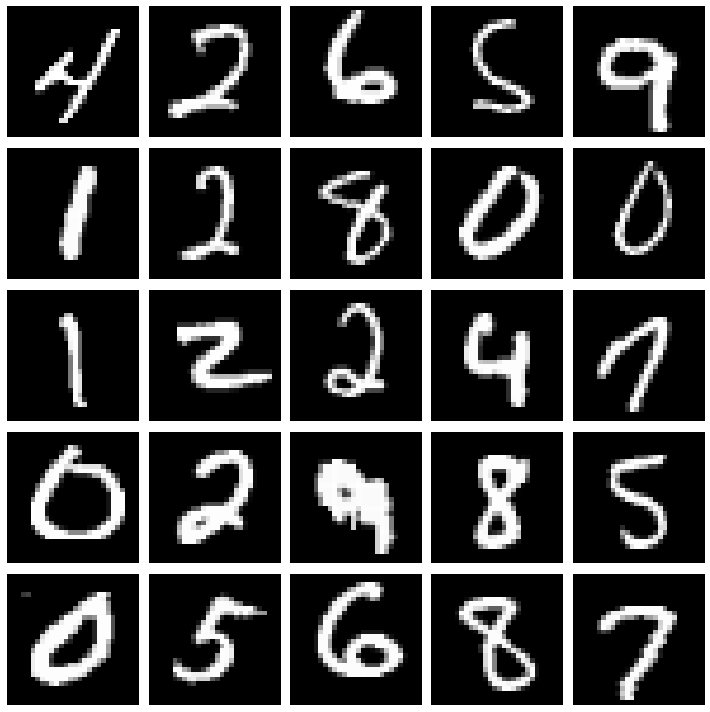

In [6]:
plt.figure(figsize=(10, 10))
for i in range(25):
    ix = np.random.randint(0, X.shape[0])
    img = X[ix].reshape(28, 28)
    plt.subplot(5, 5, i+1)
    plt.imshow(img, cmap=plt.cm.gray)
    plt.axis(False)
plt.tight_layout()

In [7]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [8]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

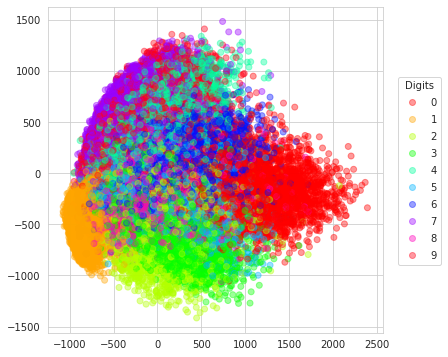

In [9]:
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111)
scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], c=y, label=y, cmap=plt.cm.hsv, alpha=0.4)
legend = ax.legend(*scatter.legend_elements(), bbox_to_anchor=(1.03, 0.8), loc="best", title="Digits")
plt.show()

In [10]:
pca = PCA()
pca.fit(X)

explained_ratio = np.cumsum(pca.explained_variance_ratio_)

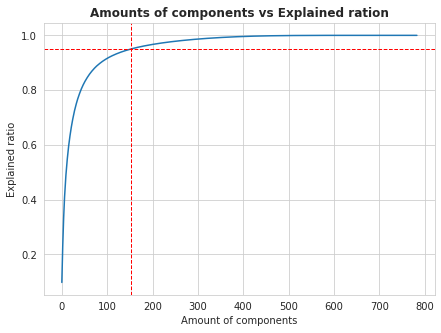

In [13]:
plt.figure(figsize=(7, 5))
plt.plot(explained_ratio)
plt.axhline(y=explained_ratio[(explained_ratio > 0.95).argmax()], c='r', lw=1, ls='--')
plt.axvline(x=(explained_ratio > 0.95).argmax(), c='r', lw=1, ls='--')
plt.xlabel('Amount of components')
plt.ylabel('Explained ratio')
plt.title('Amounts of components vs Explained ration', fontweight='bold')
plt.show();

In [ ]:
plt.figure(figsize=(14, 8))
for i, p in tqdm(enumerate(np.arange(5, 31, 5))):
    tsne = TSNE(n_components=2, perplexity=p)
    X_tsne = tsne.fit_transform(X)
    plt.subplot(2, 3, i+1)
    plt.scatter(X_tsne[:, 0], X_tsne[:, 1], cmap='hls')
    plt.title(f'Perplexity={p}')
plt.tight_layout();